In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.interpolate import UnivariateSpline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [ ]:
uploaded = files.upload()

Saving apple_quality.csv to apple_quality (1).csv


In [ ]:
df = pd.read_csv('apple_quality.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [ ]:
null_counts = df.isnull().sum()
null_counts

,0
A_id,1
Size,1
Weight,1
Sweetness,1
Crunchiness,1
Juiciness,1
Ripeness,1
Acidity,0
Quality,1


In [ ]:
# Drop all rows with any null values
df = df.dropna()

# Verify that all null rows are dropped
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB
None


In [ ]:
null_counts = df.isnull().sum()
null_counts

,0
A_id,0
Size,0
Weight,0
Sweetness,0
Crunchiness,0
Juiciness,0
Ripeness,0
Acidity,0
Quality,0


In [ ]:
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == "object":
        print(str(col))
        label = LabelEncoder()
        label = label.fit(df[col])
        df[col] = label.transform(df[col].astype(str)).astype(int)
df = df.astype({col: 'int' for col in df.select_dtypes(include='object').columns})


Quality


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 312.5 KB


In [ ]:
df.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,1
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,1
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,0
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X = df.drop(columns=['Quality'])
y = df['Quality']
# Normalizing features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Results dictionary to store performance metrics for each model
results = {
    'Regression Tree': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Ridge Regression': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Lasso Regression': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Principal Component Regression (PCR)': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Regression Splines': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Support Vector Regression (SVR)': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []}
}

num_features = X.shape[1]

# Running the models multiple times to compute average metrics
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=None)

    # Defining models
    models = {
        'Regression Tree': DecisionTreeRegressor(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Principal Component Regression (PCR)': make_pipeline(PCA(n_components=num_features), LinearRegression()),
        'Regression Splines': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
        'Support Vector Regression (SVR)': SVR()
    }

    # Fitting models and computing metrics
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rss = np.sum((y_test - y_pred) ** 2)
        rse = np.sqrt(rss / (len(y_test) - X_test.shape[1] - 1))
        r2 = r2_score(y_test, y_pred)

        results[model_name]['MSE'].append(mse)
        results[model_name]['RMSE'].append(rmse)
        results[model_name]['RSE'].append(rse)
        results[model_name]['RSS'].append(rss)
        results[model_name]['R^2'].append(r2)

# Calculating average results
average_results = {model: {metric: np.mean(scores) for metric, scores in metrics.items()} for model, metrics in results.items()}

# Converting results to a DataFrame for better visualization
results_df = pd.DataFrame(average_results).T
results_df


,MSE,RMSE,RSE,RSS,R^2
Regression Tree,0.202083,0.449336,0.451030,242.500000,0.191117
Ridge Regression,0.175363,0.418726,0.420305,210.435194,0.298072
Lasso Regression,0.250182,0.500182,0.502068,300.218704,-0.001404
Principal Component Regression (PCR),0.175365,0.418728,0.420308,210.438073,0.298063
Regression Splines,0.116407,0.341082,0.342368,139.688680,0.534057
Support Vector Regression (SVR),0.087025,0.294844,0.295956,104.429795,0.651661


Running GridSearchCV for Ridge Regression...
Ridge Regression - Best Parameters: {'ridge__alpha': 10}
Ridge Regression - Metrics: {'MSE': 0.17619075306026188, 'RMSE': 0.4197508225843779, 'RSE': 0.4213337979918519, 'RSS': 211.42890367231425, 'R²': 0.295141048623904}



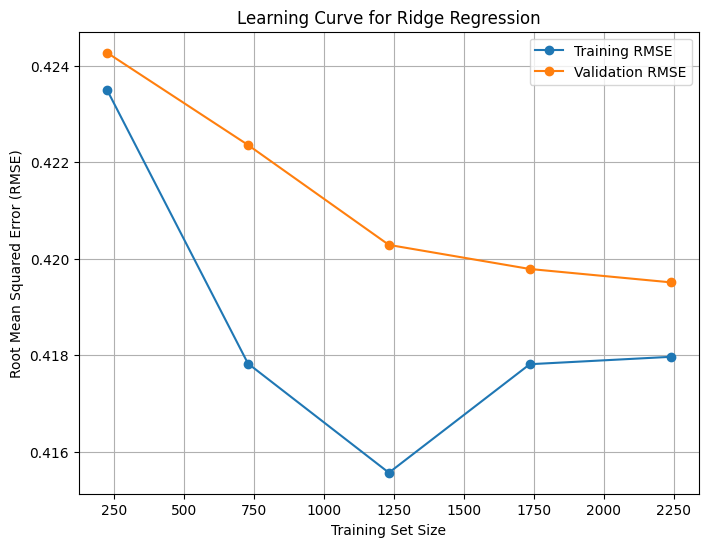

Running GridSearchCV for Lasso Regression...
Lasso Regression - Best Parameters: {'lasso__alpha': 0.01}
Lasso Regression - Metrics: {'MSE': 0.17649296163276346, 'RMSE': 0.42011065403386694, 'RSE': 0.42169498644722336, 'RSS': 211.79155395931616, 'R²': 0.29393204977572107}



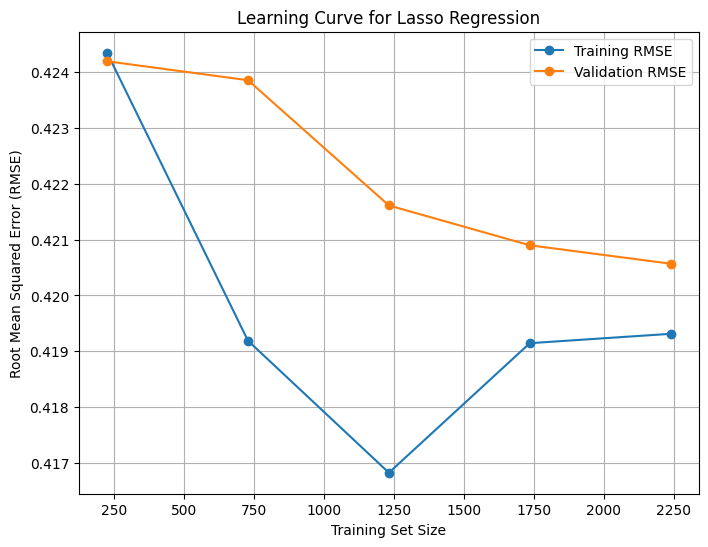

Running GridSearchCV for Principal Component Regression (PCR)...
Principal Component Regression (PCR) - Best Parameters: {'pca__n_components': 8}
Principal Component Regression (PCR) - Metrics: {'MSE': 0.1761951354729637, 'RMSE': 0.41975604280696627, 'RSE': 0.4213390379010818, 'RSS': 211.43416256755643, 'R²': 0.2951235165867917}



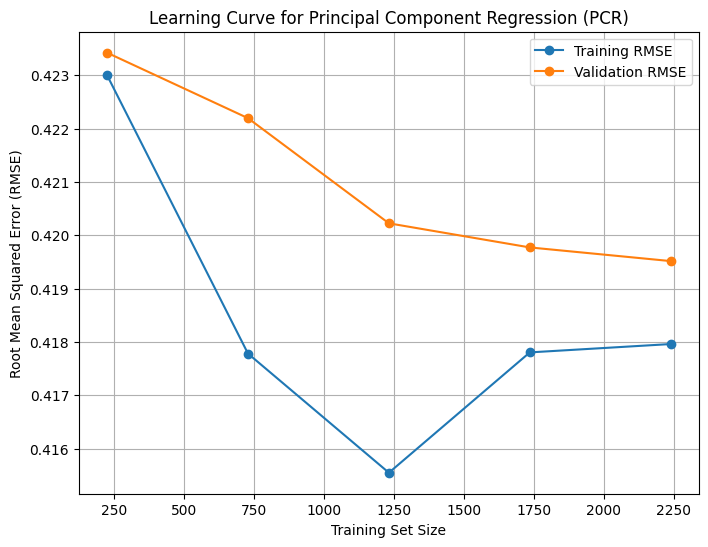

Running GridSearchCV for Regression Splines...
Regression Splines - Best Parameters: {'polynomialfeatures__degree': 3}
Regression Splines - Metrics: {'MSE': 0.11085035172594952, 'RMSE': 0.33294196450124686, 'RSE': 0.33419756404641654, 'RSS': 133.02042207113942, 'R²': 0.5565382330223633}



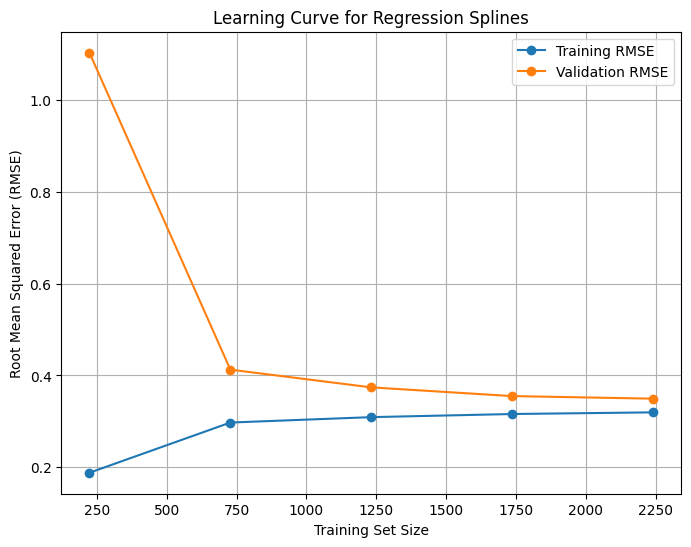

Running GridSearchCV for Regression Tree...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Regression Tree - Best Parameters: {'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__min_samples_leaf': 4, 'decisiontreeregressor__min_samples_split': 20}
Regression Tree - Metrics: {'MSE': 0.15876749419397954, 'RMSE': 0.39845638932507976, 'RSE': 0.39995905860245967, 'RSS': 190.52099303277544, 'R²': 0.3648435713768525}



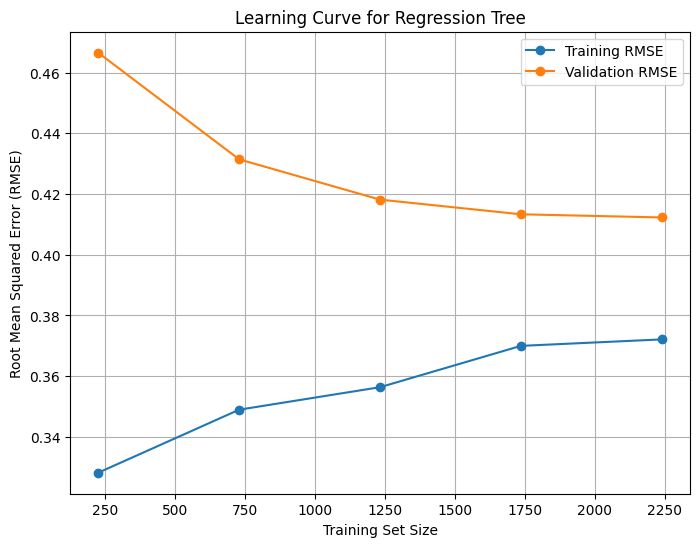

Running GridSearchCV for Support Vector Regression (SVR)...
Support Vector Regression (SVR) - Best Parameters: {'svr__C': 1, 'svr__epsilon': 0.1}
Support Vector Regression (SVR) - Metrics: {'MSE': 0.08380719869881981, 'RMSE': 0.28949473000180814, 'RSE': 0.2905864801867505, 'RSS': 100.56863843858376, 'R²': 0.664725570629612}



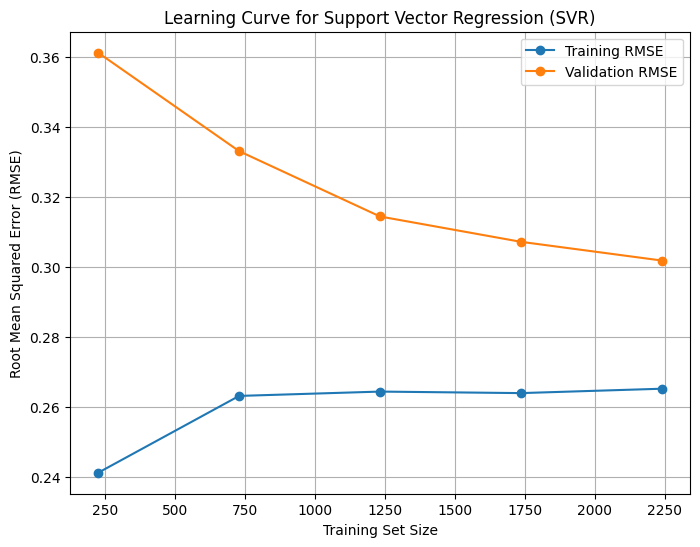


Model Performance Metrics:
                                           MSE      RMSE       RSE  \
Ridge Regression                      0.176191  0.419751  0.421334   
Lasso Regression                      0.176493  0.420111  0.421695   
Principal Component Regression (PCR)  0.176195  0.419756  0.421339   
Regression Splines                    0.110850  0.332942  0.334198   
Regression Tree                       0.158767  0.398456  0.399959   
Support Vector Regression (SVR)       0.083807  0.289495  0.290586   

                                             RSS        R²  
Ridge Regression                      211.428904  0.295141  
Lasso Regression                      211.791554  0.293932  
Principal Component Regression (PCR)  211.434163  0.295124  
Regression Splines                    133.020422  0.556538  
Regression Tree                       190.520993  0.364844  
Support Vector Regression (SVR)       100.568638  0.664726  

Best Parameters for Each Model:
Ridge Regression: {'r

In [ ]:
from sklearn.model_selection import GridSearchCV, learning_curve

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Ridge Regression': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso Regression': {'lasso__alpha': [0.01, 0.1, 1, 10, 100]},
    'Principal Component Regression (PCR)': {'pca__n_components': [1, 2, 3, 4, X.shape[1]]},
    'Regression Splines': {'polynomialfeatures__degree': [2, 3, 4]},
    'Regression Tree': {
      'decisiontreeregressor__max_depth': [3, 4, 5],
      'decisiontreeregressor__min_samples_split': [10, 15, 20],
      'decisiontreeregressor__min_samples_leaf': [4, 8, 10]
},
    'Support Vector Regression (SVR)': {'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.1, 0.5, 1]}
}



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# Function to calculate metrics
def calculate_metrics(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rss = np.sum((y_true - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_true) - n_features - 1))
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'RSE': rse, 'RSS': rss, 'R²': r2}

# Function to plot learning curves
def plot_learning_curve(model, X, y, model_name, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1
    )
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_rmse, label="Training RMSE", marker='o')
    plt.plot(train_sizes, test_rmse, label="Validation RMSE", marker='o')
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.legend()
    plt.grid()
    plt.show()

# Dictionary to store results
results = {}
best_parameters = {}

# Iterate over each model and perform GridSearchCV
for model_name, grid_params in param_grids.items():
    print(f"Running GridSearchCV for {model_name}...")

    # Define the model pipeline
    if model_name == 'Principal Component Regression (PCR)':
        model = make_pipeline(StandardScaler(), PCA(), LinearRegression())
    elif model_name == 'Regression Splines':
        model = make_pipeline(PolynomialFeatures(), LinearRegression())
    elif model_name == 'Ridge Regression':
        model = make_pipeline(StandardScaler(), Ridge(max_iter=5000))
    elif model_name == 'Lasso Regression':
        model = make_pipeline(StandardScaler(), Lasso(max_iter=5000))
    elif model_name == 'Regression Tree':
        model = make_pipeline(StandardScaler(), DecisionTreeRegressor())
    elif model_name == 'Support Vector Regression (SVR)':
        model = make_pipeline(StandardScaler(), SVR())

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, grid_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Store the best parameters
    best_parameters[model_name] = grid_search.best_params_

    # Predict on the test set using the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    # Calculate performance metrics
    metrics = calculate_metrics(y_test, y_pred, X_test_scaled.shape[1])
    results[model_name] = metrics

    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Metrics: {metrics}\n")

    # Plot learning curve for the best model
    plot_learning_curve(best_model, X_train_scaled, y_train, model_name)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics:")
print(results_df)

# Display best parameters for each model
print("\nBest Parameters for Each Model:")
for model_name, params in best_parameters.items():
    print(f"{model_name}: {params}")


In [ ]:
results_df

,MSE,RMSE,RSE,RSS,R²
Ridge Regression,0.176191,0.419751,0.421334,211.428904,0.295141
Lasso Regression,0.176493,0.420111,0.421695,211.791554,0.293932
Principal Component Regression (PCR),0.176195,0.419756,0.421339,211.434163,0.295124
Regression Splines,0.110850,0.332942,0.334198,133.020422,0.556538
Regression Tree,0.158767,0.398456,0.399959,190.520993,0.364844
Support Vector Regression (SVR),0.083807,0.289495,0.290586,100.568638,0.664726
